<a href="https://colab.research.google.com/github/sarthaksolow/VPeakFit/blob/main/meal_review_and_tips_gemini_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:

! pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf

In [44]:
from IPython.display import display
from IPython.display import Markdown
import textwrap
import langchain_google_genai

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [12]:
import google.generativeai as genai
from google.colab import userdata
import os

In [13]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

**using langchain**

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [15]:
llm=ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY)

In [16]:
result=llm.invoke("whats the best place to go for a date around dwarka delhi  ")

In [17]:
to_markdown(result.content)

> **Dine-In Restaurants:**
> 
> * **Gulati Restaurant:** A renowned restaurant serving authentic North Indian cuisine, known for its butter chicken.
> * **Karim's:** A legendary eatery specializing in Mughlai dishes, known for its mutton korma and taftan bread.
> * **Indian Accent:** A fine-dining restaurant offering modern Indian cuisine with a contemporary twist.
> * **Pind Balluchi:** A casual dining restaurant serving Punjabi dishes with a rustic ambiance.
> * **Zeeshan:** A popular restaurant known for its Hyderabadi biryani and kebabs.
> 
> **Cafes and Bakeries:**
> 
> * **Coffeebeans & Tea Leaf:** A cozy cafe with a wide selection of coffee, tea, and pastries.
> * **The Doon School Bakery:** A quaint bakery offering fresh-baked pastries, cakes, and breads.
> * **Le Pain Quotidien:** A bakery and cafe known for its artisanal breads and organic ingredients.
> * **Starbucks:** A global coffee chain with a convenient location in Dwarka.
> 
> **Shopping Malls:**
> 
> * **Pacific Mall:** A large shopping mall with a variety of stores, restaurants, and entertainment options.
> * **DLF Promenade:** A high-end shopping mall featuring luxury brands and fine-dining restaurants.
> * **Vegas Mall:** A popular mall with a wide range of shops, food outlets, and a movie theater.
> 
> **Parks and Gardens:**
> 
> * **Dwarka Sector 9 Park:** A sprawling park with walking trails, play areas, and a lake.
> * **Central Park:** A well-maintained park with a variety of flowers, trees, and water bodies.
> * **Japanese Park:** A serene park inspired by Japanese gardens, featuring a pond, bridges, and teahouse.
> 
> **Other Options:**
> 
> * **Jawahar Lal Nehru Stadium:** Attend a cricket match or other sporting event.
> * **National Geographic Channel India:** Visit the studio for a behind-the-scenes tour of popular TV shows.
> * **The Great India Place:** A large amusement park with rides, games, and a water park.
> * **Kingdom of Dreams:** A cultural and entertainment complex showcasing live performances, food, and shopping.

**GEMINI PRO VISION**

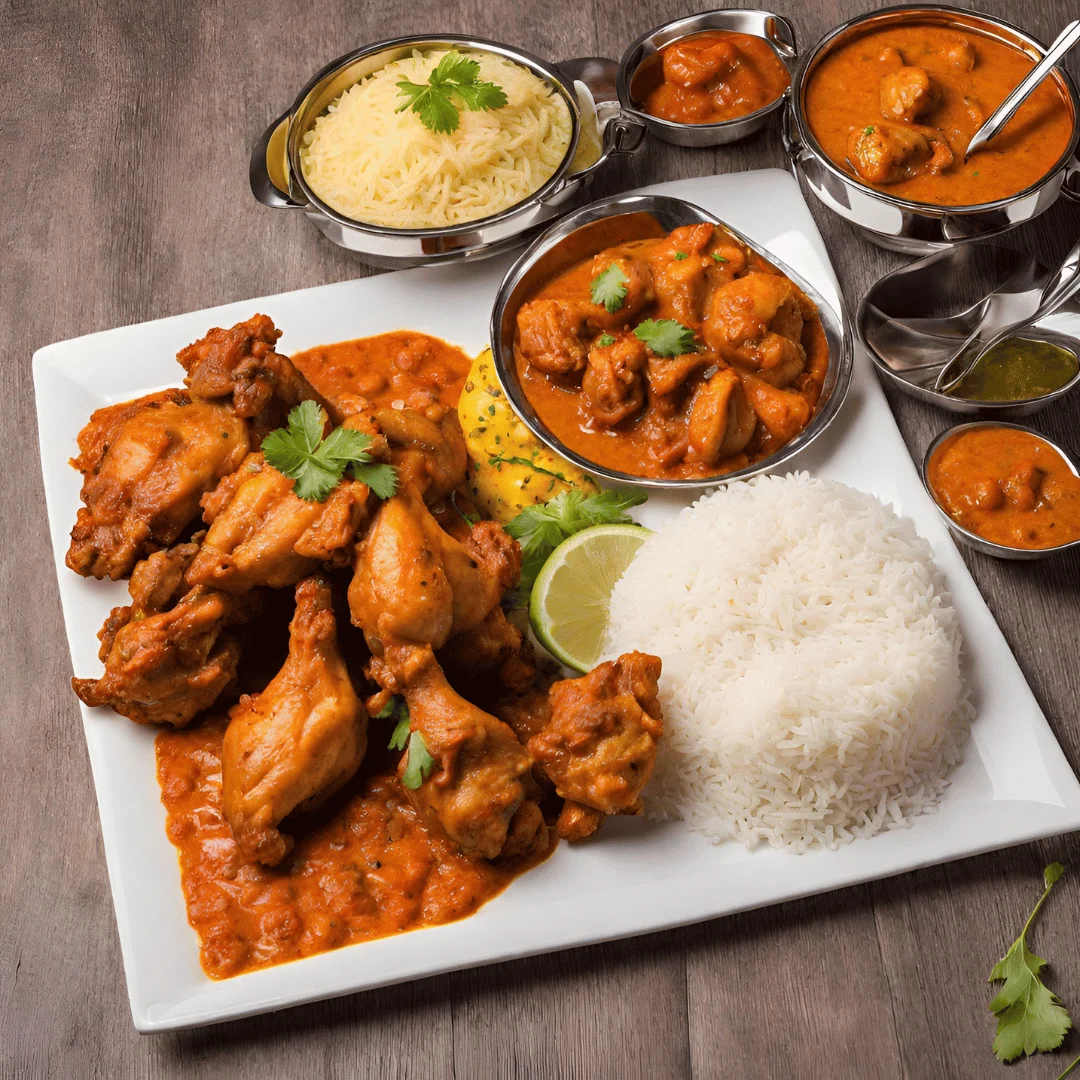

In [60]:
import PIL.Image
image=PIL.Image.open("/content/Chicken-Specialties-meal-for-two-mix-non-veg-platter.webp")
image

In [19]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [20]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key=GOOGLE_API_KEY)  # Replace with a supported model

In [65]:
def rate_meal(image_path,age,weight,goal,profession):

    message = HumanMessage(
        content=[
            {
                "type": "text",
                "text": f"As a nutritionist of top class please tell the review of this meal...if the person is of age {age} and weight {weight} please tell if this meal is sufficeint for them for not. Also consider goal of the user{goal}. if you think the portions are too large or too small according to the age please state a warning.Make suggestions about the meal accordingly so that it could be as personlized as possible. pay importance to the profession{profession} of the user and give a personalized response. if u dont know the units or the exact count of number of items in the picture take an avg of a how many of them are consumed in one meal by a person of given age. " # Use f-string for formatting
            },
            {
                "type": "image_url",
                "image_url": image_path
            }
        ]
    )


    response = llm.invoke([message])

    print(response.content)

rate_meal("/content/Chicken-Specialties-meal-for-two-mix-non-veg-platter.webp", 23, 70,"improving health","IT employee")


This meal looks delicious and flavorful! It includes a variety of components that contribute to a balanced and satisfying meal. Let's break it down:

**Protein:** The chicken curry provides a good source of protein, essential for building and repairing tissues, supporting a healthy immune system, and maintaining energy levels. The portion seems adequate for a 23-year-old, but if you're aiming for a more protein-rich diet, you might consider adding a small side of grilled chicken or fish.

**Carbohydrates:** The rice serves as a good source of carbohydrates, providing energy and fueling your body. The portion size looks appropriate, but if you're looking to manage blood sugar levels, you might consider opting for brown rice or quinoa instead of white rice.

**Fiber:** The meal includes some fiber from the rice and the vegetables in the curry, which is important for digestive health and promoting satiety. To increase your fiber intake, you could add a side salad with leafy greens and a l

**BODY MASS INDEX**

In [55]:
!pip install langchain

from langchain.chains import SimpleSequentialChain
from langchain.prompts import HumanMessagePromptTemplate


In [59]:

#enter weight in kg and height in m^2
def bmi(weight, height):

    bmi_value = weight / (height * height)

    message = HumanMessage(
        content=f"The user's BMI is {bmi_value:.2f}. Please classify it into the appropriate zone (underweight, normal, overweight, etc. also state that bmi is not the only factor to chek ones physical well being provide some tips to get the user back into fight category ie; if the person is obese provide suitable tips,if underweight proive suitable tips...answer this as if your are a top nutritionist at a hospital. try to avoid paragraphs and give information in poitns so as to make it more appealing)."
    )


    response = llm.invoke([message])


    print(response.content)

bmi(63, 1.7)





Hello! Based on your BMI of 21.80, you fall within the **healthy weight range**. That's great news! 

However, it's important to remember that BMI is just one piece of the puzzle when it comes to overall health. It doesn't take into account factors like muscle mass, body composition, and individual health conditions. 

To ensure optimal well-being, it's always best to consult with a healthcare professional who can provide personalized advice. 

Since you are within the healthy range, focusing on maintaining a balanced and active lifestyle is key. Here are some general tips:

* **Prioritize whole foods:** Aim for a diet rich in fruits, vegetables, lean protein, whole grains, and healthy fats. 
* **Stay hydrated:** Drink plenty of water throughout the day.
* **Move your body:** Engage in at least 150 minutes of moderate-intensity aerobic activity or 75 minutes of vigorous-intensity aerobic activity per week.
* **Get enough sleep:** Aim for 7-9 hours of quality sleep each night.
* **Manag

**EXCERCISES TO DO AT HOME OR W/O EQUIPMENTS**

In [72]:
def exercise(age, weight, goal, profession):

    message = HumanMessage(
        content= f"The user is a {age}-year-old {profession} weighing {weight} kg. Their goal is {goal}. "
                    "Please provide a personalized at home exercise plan consisting of basic workouts according to the age for a week so that they could follow and target diff sections of body each day to ensure good physical fitness."
    )


    response = llm.invoke([message])

    print(response.content)

# Example usage
exercise(age=30, weight=70, goal="loose weight", profession="homemaker")



## Personalized At-Home Exercise Plan for a 30-Year-Old Homemaker (70 kg)

**Goal:** Weight Loss & Overall Fitness

**Important Note:** This is a sample plan. It's essential to consult with a doctor or certified personal trainer before starting any new exercise program. Adjust the intensity and duration based on your fitness level and listen to your body. 

**Warm-up (5 minutes):**  
* Light cardio:  Jog in place, jumping jacks, high knees, butt kicks.
* Dynamic stretches: Arm circles, leg swings, torso twists.

**Cool-down (5 minutes):**
* Static stretches: Hold each stretch for 30 seconds, focusing on major muscle groups (legs, back, chest, shoulders).

**Week-long Schedule:**

**Day 1: Legs & Glutes**
* **Squats:** 3 sets of 12-15 reps
* **Lunges:** 3 sets of 10-12 reps per leg
* **Glute bridges:** 3 sets of 15-20 reps
* **Calf raises:** 3 sets of 15-20 reps

**Day 2: Upper Body (Arms & Shoulders)**
* **Push-ups:** 3 sets of as many reps as possible (AMRAP)
* **Dumbbell rows:** 3 se